# Titanic: Machine Learning from Disaster


#### import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

##### load data

In [2]:
titanic = pd.read_csv(r'C:\Users\sony\Desktop\1\titanic\train.csv')
test =  pd.read_csv(r'C:\Users\sony\Desktop\1\titanic\test.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Checking the structure of the data 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Training set has 891 rows and test set has 418 rows.<br>
Training set have 12 features and test set have 11 features.<br>
One extra feature in training set is Survived feature, which is the target variable.

#### Combining both data sets

In [5]:
titanic_full = pd.concat([titanic,test], sort =True).reset_index(drop = True)

In [6]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Changing variable data type 

In [7]:
titanic_full['Survived'] = titanic_full['Survived'].astype('category')
titanic_full['Pclass'] = titanic_full['Pclass'].astype('category')
titanic_full['Sex'] = titanic_full['Sex'].astype('category')
titanic_full['Embarked'] = titanic_full['Embarked'].astype('category')
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null category
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null category
Sex            1309 non-null category
SibSp          1309 non-null int64
Survived       891 non-null category
Ticket         1309 non-null object
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 87.4+ KB


#### Exploratory Data Analysis

PassengerId is the unique id of the row for each passenger.<br>
Survived is the dependent variable we are trying to predict. It is a categorical feature which has 2 unique values (0 or 1):<br>
1 = Survived<br>
0 = Not Survived<br>
Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical feature which has 3 unique values (1, 2 or 3):<br>
1 = Upper Class<br>
2 = Middle Class<br>
3 = Lower Class<br>
Name is the name of the passenger.<br>
Age is the age of the passenger.<br>
Sex is the gender of the passenger. It is a categorical feature which has 2 unique values (female or male).<br>
SibSp is the total number of the passengers' siblings and spouse.<br>
Parch is the total number of the passengers' parents and children.<br>
Ticket is the ticket number of the passenger.<br>
Fare is the passenger fare.<br>
Cabin is the cabin number of the passenger.<br>
Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):<br>
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton<br>

Text(0.5, 1.0, 'Survival w.r.t Sex')

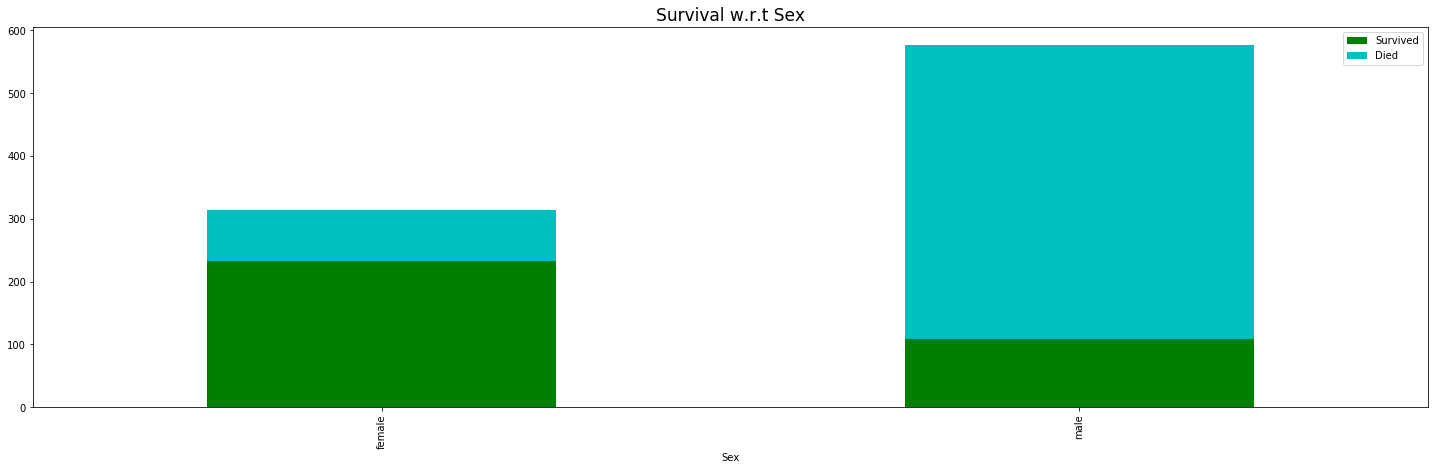

In [8]:
# plotting survival with respect to sex
titanic['Died'] = 1 - titanic['Survived']
titanic.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),stacked=True, color=['g', 'c'])
plt.title('Survival w.r.t Sex',fontsize=17)
                                                          

Females are more likely to survive then men.

C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Survival w.r.t Pclass')

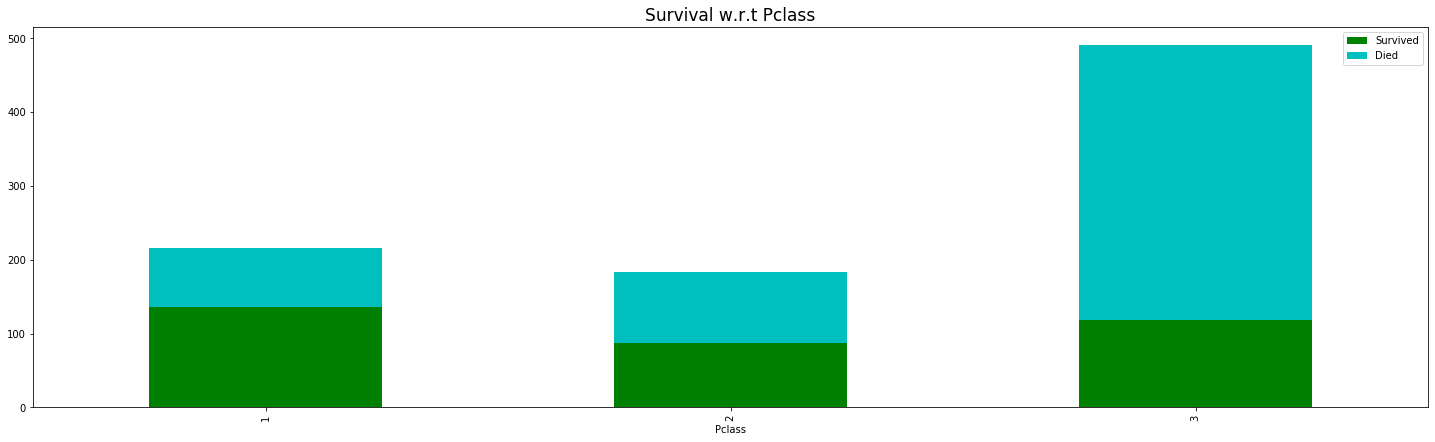

In [9]:
# plotting survival with respect to passenger class
titanic.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),stacked=True, colors=['g', 'c'])
plt.title('Survival w.r.t Pclass',fontsize=17)

First class passengers are more likely to survive then othen two classes.<br>

Third class passengers are most likely to have died.

Text(0.5, 1.0, 'Survival w.r.t city Embarked')

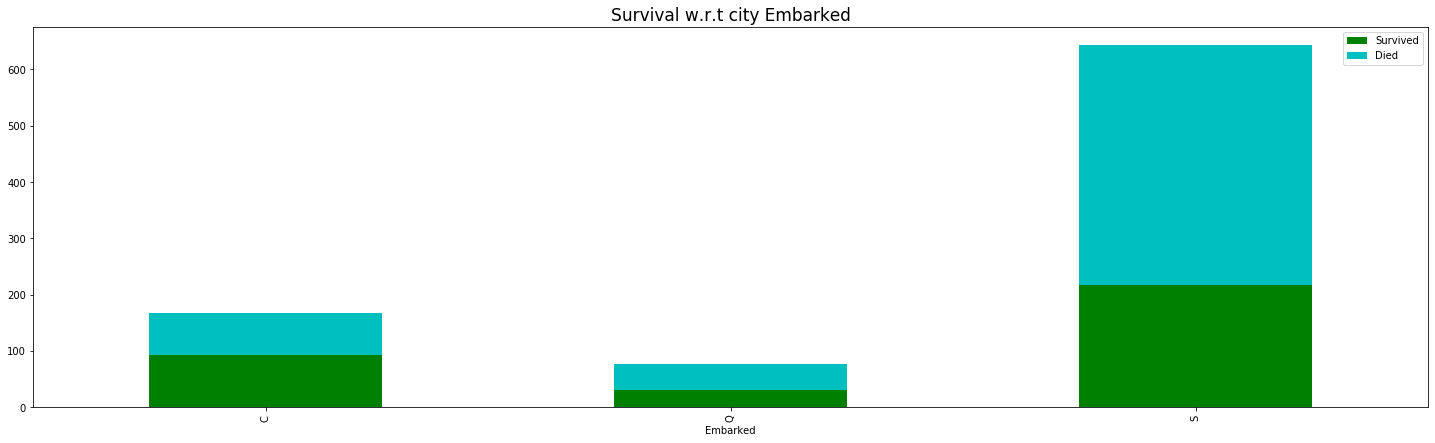

In [10]:
# plotting survival with respect to Emaberked
titanic.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),stacked=True, colors=['g', 'c'])
plt.title('Survival w.r.t city Embarked',fontsize=17)

In [11]:
# creating table to get better understanding
pd.crosstab(index=titanic['Survived'], 
                             columns=titanic['Embarked'],
                             margins=True)

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


Of all the people who boarded from Southampton, 427(around 66%) died.<br>

Of all the people who boarded from Queenstown, 47(around 61%) died.<br>

Of all the people who boarded from Cherbourg, 75(around 45%) died.


Text(0.5, 1.0, 'Survival w.r.t Age')

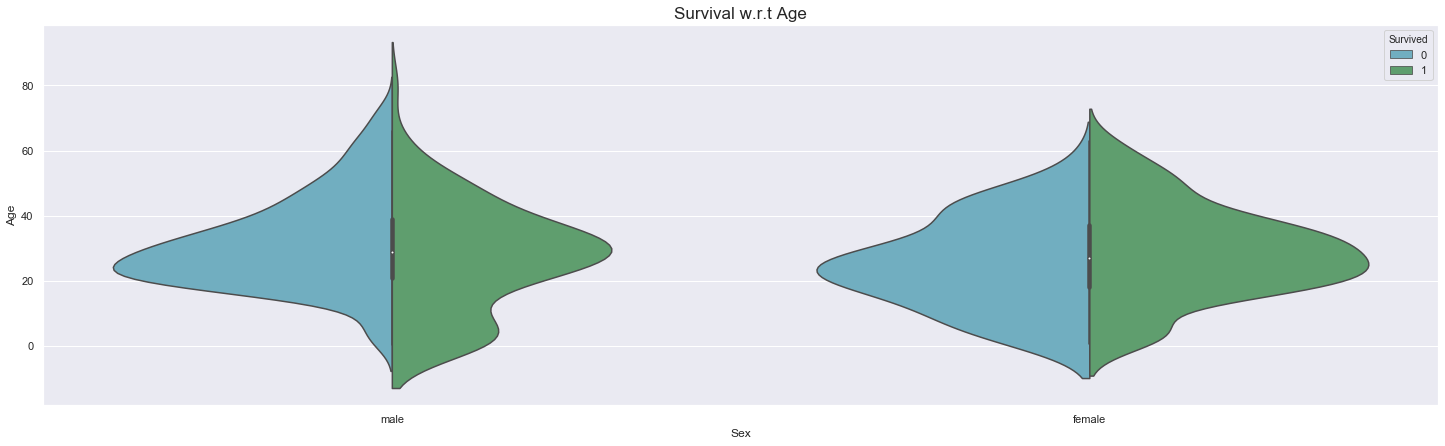

In [12]:
# plotting survival with respect to age
sns.set(rc={'figure.figsize':(25,7)})
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic, split=True,palette={0: "c", 1: "g"})
plt.title('Survival w.r.t Age',fontsize=17)


Younger male more likely to survive.<br>

A large number of passengers between 20 and 40 die.<br>

The age doesn't seem to have a direct impact on the female survival.

#### Missing values

Filling the missing values in age variables with the median age after gropuing the data by sex and passenger class. Group by was performed since using median age of the whole data set is not a good choice. And Age has high correlation with sex and passenger class.<br>

Same way the missing values of Embarked and Fare avriables are filled.

In [13]:
titanic_full['Age'] = titanic_full.groupby(['Sex','Pclass']).transform(lambda x: x.fillna(x.median()))
titanic_full['Embarked'] = titanic_full.groupby(['Sex','Pclass']).transform(lambda x: x.fillna(x.mode()))
titanic_full['Fare'] = titanic_full.groupby(['Age','Pclass']).transform(lambda x: x.fillna(x.median()))
titanic_full.isna().sum()

C:\Users\sony\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

#### Removing variables

In [14]:
titanic_full.drop(columns = ['Name','Cabin','Ticket','PassengerId'], inplace = True)
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null category
Sex         1309 non-null category
SibSp       1309 non-null int64
Survived    891 non-null category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 55.4+ KB


#### Encoding categorical variables

In [15]:
cat_features = ['Sex', 'Embarked']
encoder = LabelEncoder()
for i in cat_features:
    titanic_full[i] = encoder.fit_transform(titanic_full[i])
titanic_full.dtypes

Age          float64
Embarked       int32
Fare         float64
Parch          int64
Pclass      category
Sex            int32
SibSp          int64
Survived    category
dtype: object

#### Splitting data again


In [16]:
titanic_train = titanic_full.loc[:890]
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Age         891 non-null float64
Embarked    891 non-null int32
Fare        891 non-null float64
Parch       891 non-null int64
Pclass      891 non-null category
Sex         891 non-null int32
SibSp       891 non-null int64
Survived    891 non-null category
dtypes: category(2), float64(2), int32(2), int64(2)
memory usage: 36.9 KB


In [17]:
titanic_test = titanic_full.loc[891:]
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
Age         418 non-null float64
Embarked    418 non-null int32
Fare        418 non-null float64
Parch       418 non-null int64
Pclass      418 non-null category
Sex         418 non-null int32
SibSp       418 non-null int64
Survived    0 non-null category
dtypes: category(2), float64(2), int32(2), int64(2)
memory usage: 17.5 KB


#### Splitting the training data

In [18]:
X = titanic_train.drop(['Survived'], axis = 1)
y = titanic_train['Survived']


In [19]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8,random_state = 50)

#### Model creation

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_y)
prediction = rf_model.predict(val_X)
prediction

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0.])

#### Model Evaluation

In [21]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_y,prediction)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,90,11
Actual Positive,24,54


In [22]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

confusion_metrics (cm)

True Positives: 54
True Negatives: 90
False Positives: 11
False Negatives: 24
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.69
Specificity: 0.89
Precision: 0.89
f_1 Score: 0.78


#### Calculating class probabilities


In [24]:
pred_prob = [i[1] for i in rf_model.predict_proba(val_X)]


In [25]:
auc = metrics.roc_auc_score(val_y,pred_prob)
auc

0.8263518659558264

In [27]:
fpr, tpr, threshold = metrics.roc_curve(val_y,pred_prob)

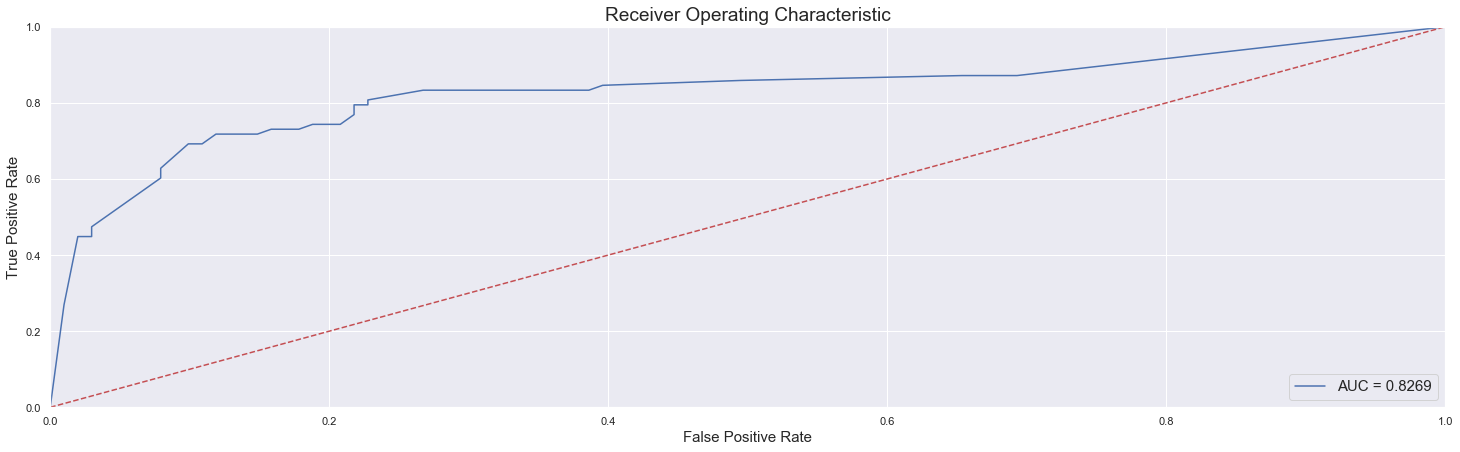

In [28]:
plt.title('Receiver Operating Characteristic', fontsize = 19)
plt.plot(fpr, tpr, 'b', label = 'AUC = ' + str(round(auc,4)))
plt.legend(loc = 'lower right', prop={'size': 15})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)

plt.show()

#### Hyper parameter tuning

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [30]:
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_X,train_y)
prediction2 = rf_random.predict(val_X)
prediction2

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.5min finished


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0.])

In [31]:
cm2 = metrics.confusion_matrix(val_y,prediction2)
cm2_df = pd.DataFrame(cm2, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm2_df

,Predicted Negative,Predicted Positive
Actual Negative,92,9
Actual Positive,26,52


In [32]:
confusion_metrics (cm2)

True Positives: 52
True Negatives: 92
False Positives: 9
False Negatives: 26
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.67
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.77


In [33]:
pred2_prob = [i[1] for i in rf_random.predict_proba(val_X)]
auc = metrics.roc_auc_score(val_y,pred2_prob)
auc

0.8613226707286112

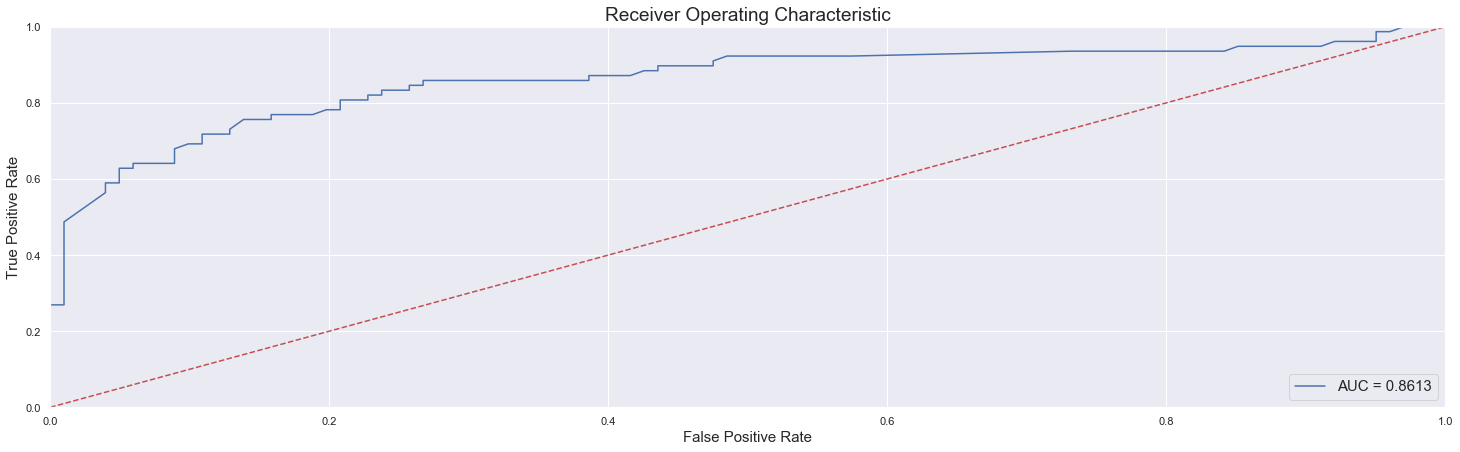

In [45]:
fpr, tpr, threshold = metrics.roc_curve(val_y,pred2_prob)
plt.title('Receiver Operating Characteristic', fontsize = 19)
plt.plot(fpr, tpr, 'b', label = 'AUC = ' + str(round(auc,4)) )
plt.legend(loc = 'lower right', prop={'size': 15})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)

plt.show()

#### Making predictions on test set

In [ ]:
titanic_test = titanic_test.drop(['Survived'], axis = 1)

In [41]:
pred_test = rf_random.predict(titanic_test)
pred_test

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.